# Prepare stock market data

## Task 1. a

### 1. Find all stock csv files (incorrectly labelled as txt)

In [1]:
import glob

base_path = './stock-market/Data/Stocks'
paths = []

for file in glob.glob(base_path + '/*.txt'):
    paths.append(file)

paths[:5]

['./stock-market/Data/Stocks/sdrl.us.txt',
 './stock-market/Data/Stocks/esge.us.txt',
 './stock-market/Data/Stocks/jobs.us.txt',
 './stock-market/Data/Stocks/pacb.us.txt',
 './stock-market/Data/Stocks/iac.us.txt']

### 2. Create dataframe while removing empty files

In [2]:
import pandas as pd

df_list = []
empty_file_symbols = []

count = 0
for path in paths:
    count += 1
    symbol = path.split('/')[-1].split('.')[0]

    # Attempt to read the stock data
    try:
        stock_df = pd.read_csv(path)
        stock_df['Symbol'] = symbol
        df_list.append(stock_df)

    # If stock data is invalid or doens't exist, ignore
    except:
        empty_file_symbols.append(symbol)

df = pd.concat(df_list, ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Symbol'] = df['Symbol'].astype('string')

df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Symbol
0,2005-08-25,5.5182,5.5182,5.5182,5.5182,16962,0,sdrl
1,2005-09-01,6.1761,6.1761,6.1761,6.1761,1698,0,sdrl
2,2005-09-02,6.0700,6.1761,6.0347,6.0700,18727,0,sdrl
3,2005-09-06,5.9286,6.0700,5.7517,5.9286,55410,0,sdrl
4,2005-09-07,5.8224,6.1054,5.7517,5.8224,47212,0,sdrl


In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Date,Open,High,Low,Close,Volume,OpenInt
count,14887665,14887665.00,14887665.00,14887665.00,14887665.00,14887665.00,14887665.00
mean,2010-06-19 22:22:30.382939136,30385.38,31212.47,29361.76,30245.22,1585730.32,0.00
min,1962-01-02 00:00:00,0.00,0.00,-1.00,0.00,0.00,0.00
25%,2007-11-29 00:00:00,7.75,7.88,7.61,7.75,32800.00,0.00
50%,2012-02-17 00:00:00,15.68,15.92,15.43,15.68,192266.00,0.00
75%,2015-05-21 00:00:00,28.90,29.28,28.50,28.90,891786.00,0.00
max,2017-11-10 00:00:00,1423712891.00,1442048636.45,1362117843.98,1437986240.44,2423735131.00,0.00
std,NaN,4202500.95,4323485.55,4046981.00,4180590.07,7635186.71,0.00


### 3. Show column data types

In [4]:
print('Data types of columns:')
print(df.dtypes)

Data types of columns:
Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
Symbol     string[python]
dtype: object


### 4. Summary statistics

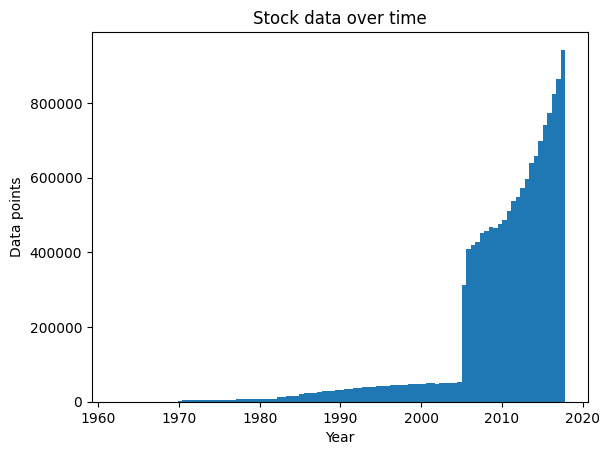

In [5]:
import matplotlib.pyplot as plt

plt.hist(data=df, x='Date', bins=100)
plt.title('Stock data over time')
plt.xlabel('Year')
plt.ylabel('Data points')
plt.show()

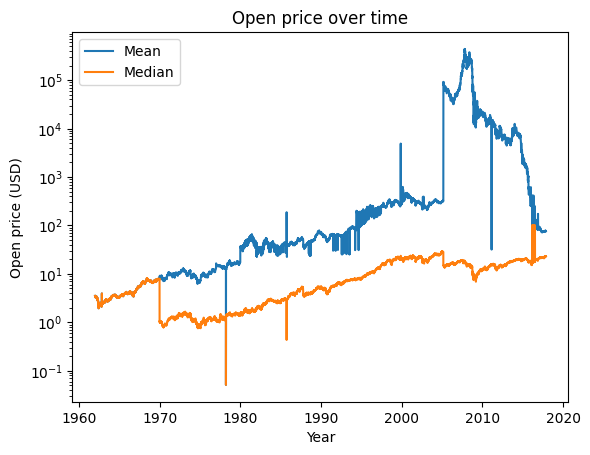

In [6]:
date_data = df.groupby('Date')
dates = date_data.indices.keys()

plt.plot(dates, date_data['Open'].mean(), label='Mean')
plt.plot(dates, date_data['Open'].median(), label='Median')
plt.title('Open price over time')
plt.xlabel('Year')
plt.ylabel('Open price (USD)')
plt.yscale('log')
plt.legend()
plt.show()

## Task 1. b

### 1. Find missing values

In [7]:
print('Missing values in data:')
print(df.isna().sum())

print('\nStock symbols with empty files:')
print(len(empty_file_symbols), '-', empty_file_symbols)

Missing values in data:
Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Symbol     0
dtype: int64

Stock symbols with empty files:
32 - ['vist', 'bolt', 'ehr', 'rbio', 'pbio', 'sfix', 'boxl', 'asns', 'accp', 'bxg', 'amrhw', 'sail', 'amrh', 'stnl', 'scci', 'vmet', 'pxus', 'hayu', 'send', 'mapi', 'srva', 'bbrx', 'znwaa', 'sbt', 'wnfm', 'fmax', 'molc', 'wspt', 'gnst', 'scph', 'jt', 'otg']


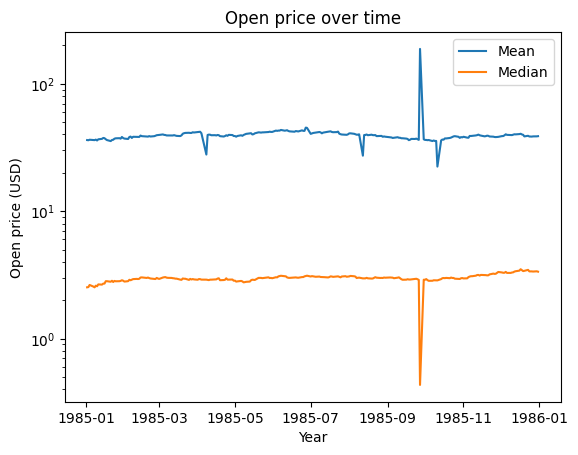

In [8]:
import datetime as dt

date_data = df[(df['Date'] > dt.datetime(1985, 1, 1)) & (df['Date'] < dt.datetime(1986, 1, 1))].groupby('Date')
dates = date_data.indices.keys()

plt.plot(dates, date_data['Open'].mean(), label='Mean')
plt.plot(dates, date_data['Open'].median(), label='Median')
plt.title('Open price over time')
plt.xlabel('Year')
plt.ylabel('Open price (USD)')
plt.yscale('log')
plt.legend()
plt.show()

## Task 2. a

### Ignore empty/invalid csv's

In [9]:
print('Total stock csv\'s:', len(paths))
print('Empty/invalid stock csv\'s:', len(empty_file_symbols))

Total stock csv's: 7195
Empty/invalid stock csv's: 32


Ignore empty or invalid stock csv's since there are way less than the total.

## Task 2. b

### Drop OpenInt since ever value is 0

In [10]:
print('Unique values in OpenInt column:', df['OpenInt'].unique())

df = df.drop(columns=['OpenInt'])

df.head()

Unique values in OpenInt column: [0]


,Date,Open,High,Low,Close,Volume,Symbol
0,2005-08-25,5.52,5.52,5.52,5.52,16962,sdrl
1,2005-09-01,6.18,6.18,6.18,6.18,1698,sdrl
2,2005-09-02,6.07,6.18,6.03,6.07,18727,sdrl
3,2005-09-06,5.93,6.07,5.75,5.93,55410,sdrl
4,2005-09-07,5.82,6.11,5.75,5.82,47212,sdrl


## Task 3. a

### Find z-score for each column

In [11]:
df = df[(df['Open'] >= 0)
   & (df['High'] >= 0)
   & (df['Low'] >= 0)
   & (df['Close'] >= 0) 
   & (df['Volume'] >= 0)]

In [12]:
import numpy as np

num_fields = ['Open', 'High', 'Low', 'Close', 'Volume']

df_scaled = df.copy()

df_scaled[num_fields] = df_scaled[num_fields].apply(np.log1p)

pd.set_option('display.float_format', '{:.4f}'.format)
df_scaled.head()

,Date,Open,High,Low,Close,Volume,Symbol
0,2005-08-25,1.8746,1.8746,1.8746,1.8746,9.7388,sdrl
1,2005-09-01,1.9708,1.9708,1.9708,1.9708,7.4378,sdrl
2,2005-09-02,1.9559,1.9708,1.9509,1.9559,9.8378,sdrl
3,2005-09-06,1.9357,1.9559,1.9098,1.9357,10.9225,sdrl
4,2005-09-07,1.9202,1.9609,1.9098,1.9202,10.7624,sdrl


In [13]:
for field in num_fields:
    df_scaled[f'{field}_zscore'] = (df_scaled[field] - df_scaled[field].mean())/df_scaled[field].std(ddof=0)

df_scaled.head()

,Date,Open,High,Low,Close,Volume,Symbol,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore
0,2005-08-25,1.8746,1.8746,1.8746,1.8746,9.7388,sdrl,-0.8712,-0.8849,-0.8568,-0.8712,-0.8540
1,2005-09-01,1.9708,1.9708,1.9708,1.9708,7.4378,sdrl,-0.7817,-0.7953,-0.7674,-0.7817,-1.7538
2,2005-09-02,1.9559,1.9708,1.9509,1.9559,9.8378,sdrl,-0.7956,-0.7953,-0.7859,-0.7955,-0.8153
3,2005-09-06,1.9357,1.9559,1.9098,1.9357,10.9225,sdrl,-0.8144,-0.8092,-0.8241,-0.8143,-0.3911
4,2005-09-07,1.9202,1.9609,1.9098,1.9202,10.7624,sdrl,-0.8288,-0.8046,-0.8241,-0.8287,-0.4537


In [14]:
df_scaled[(df_scaled['Open_zscore'] > 3) | (df_scaled['Open_zscore'] < -3)
   | (df_scaled['High_zscore'] > 3) | (df_scaled['High_zscore'] < -3)
   | (df_scaled['Low_zscore'] > 3) | (df_scaled['Low_zscore'] < -3)
   | (df_scaled['Close_zscore'] > 3) | (df_scaled['Close_zscore'] < -3)
   | (df_scaled['Volume_zscore'] > 3) | (df_scaled['Volume_zscore'] < -3)]

,Date,Open,High,Low,Close,Volume,Symbol,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore
594,2008-03-24,2.9259,2.9259,2.8872,2.9259,0.0000,sdrl,0.1076,0.0947,0.0853,0.1077,-4.6623
12614,2010-04-26,3.1257,3.1280,3.1215,3.1240,0.0000,iac,0.2936,0.2830,0.3033,0.2922,-4.6623
45881,2008-07-17,3.4340,3.4340,3.4340,3.4340,0.0000,inpx,0.5807,0.5681,0.5940,0.5808,-4.6623
45882,2008-08-05,3.4340,3.4340,3.4340,3.4340,1.6094,inpx,0.5807,0.5681,0.5940,0.5808,-4.0329
45883,2008-08-13,1.3863,1.3863,1.3863,1.3863,3.4657,inpx,-1.3259,-1.3400,-1.3112,-1.3259,-3.3070
...,...,...,...,...,...,...,...,...,...,...,...,...
14866549,2017-11-02,3.5127,3.5127,3.5127,3.5127,1.7918,wyde,0.6540,0.6416,0.6673,0.6541,-3.9616
14866553,2017-11-08,3.5237,3.5237,3.5237,3.5237,0.0000,wyde,0.6642,0.6518,0.6775,0.6643,-4.6623
14880217,2007-06-07,2.7726,2.7726,2.7726,2.7726,0.0000,llnw,-0.0351,-0.0481,-0.0214,-0.0350,-4.6623
14886772,2016-01-19,3.2658,3.2658,3.2658,3.2658,0.0000,afsi_b,0.4241,0.4114,0.4375,0.4242,-4.6623


### Remove outliers (z-score below -3 or above 3)

In [15]:
df_scaled = df_scaled[(df_scaled['Open_zscore'] < 3) & (df_scaled['Open_zscore'] > -3)
   & (df_scaled['High_zscore'] < 3) & (df_scaled['High_zscore'] > -3)
   & (df_scaled['Low_zscore'] < 3) & (df_scaled['Low_zscore'] > -3)
   & (df_scaled['Close_zscore'] < 3) & (df_scaled['Close_zscore'] > -3)
   & (df_scaled['Volume_zscore'] < 3) & (df_scaled['Volume_zscore'] > -3)]

df_scaled.drop(columns=[f'{field}_zscore' for field in num_fields])

,Date,Open,High,Low,Close,Volume,Symbol
0,2005-08-25,1.8746,1.8746,1.8746,1.8746,9.7388,sdrl
1,2005-09-01,1.9708,1.9708,1.9708,1.9708,7.4378,sdrl
2,2005-09-02,1.9559,1.9708,1.9509,1.9559,9.8378,sdrl
3,2005-09-06,1.9357,1.9559,1.9098,1.9357,10.9225,sdrl
4,2005-09-07,1.9202,1.9609,1.9098,1.9202,10.7624,sdrl
...,...,...,...,...,...,...,...
14887660,2017-11-06,0.6419,0.6419,0.5777,0.5933,9.6151,andaw
14887661,2017-11-07,0.5988,0.5988,0.5766,0.5877,11.6231,andaw
14887662,2017-11-08,0.5878,0.5933,0.0365,0.5878,11.9290,andaw
14887663,2017-11-09,0.5878,0.5878,0.5822,0.5878,11.3555,andaw


In [16]:
df_scaled.describe()

,Date,Open,High,Low,Close,Volume,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore
count,14723735,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000
mean,2010-06-24 10:31:14.976044032,2.7680,2.7819,2.7533,2.7679,11.9907,-0.0394,-0.0394,-0.0393,-0.0394,0.0265
min,1962-01-02 00:00:00,0.0000,0.0040,0.0000,0.0037,4.2627,-2.6167,-2.6281,-2.6010,-2.6133,-2.9954
25%,2007-12-06 00:00:00,2.1617,2.1767,2.1452,2.1616,10.4548,-0.6039,-0.6034,-0.6050,-0.6040,-0.5741
50%,2012-02-24 00:00:00,2.8021,2.8162,2.7872,2.8021,12.1938,-0.0076,-0.0075,-0.0077,-0.0075,0.1060
75%,2015-05-22 00:00:00,3.3793,3.3922,3.3659,3.3793,13.7169,0.5298,0.5292,0.5307,0.5299,0.7016
max,2017-11-10 00:00:00,6.0321,6.0434,6.0199,6.0319,19.5944,2.9998,2.9998,2.9999,2.9999,2.9999
std,NaN,0.9555,0.9542,0.9569,0.9556,2.4463,0.8897,0.8892,0.8903,0.8898,0.9566


In [17]:
df_test = df_scaled.copy()
df_test[num_fields] = df_test[num_fields].apply(lambda x: np.exp(x) - 1)

df_test.describe()

,Date,Open,High,Low,Close,Volume,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore
count,14723735,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000,14723735.0000
mean,2010-06-24 10:31:14.976044032,24.0589,24.3923,23.7094,24.0559,1577337.5318,-0.0394,-0.0394,-0.0393,-0.0394,0.0265
min,1962-01-02 00:00:00,0.0000,0.0040,0.0000,0.0037,70.0000,-2.6167,-2.6281,-2.6010,-2.6133,-2.9954
25%,2007-12-06 00:00:00,7.6863,7.8174,7.5441,7.6846,34708.0000,-0.6039,-0.6034,-0.6050,-0.6040,-0.5741
50%,2012-02-24 00:00:00,15.4800,15.7130,15.2360,15.4800,197550.0000,-0.0076,-0.0075,-0.0077,-0.0075,0.1060
75%,2015-05-22 00:00:00,28.3500,28.7310,27.9600,28.3500,906086.0000,0.5298,0.5292,0.5307,0.5299,0.7016
max,2017-11-10 00:00:00,415.5800,420.3400,410.5200,415.5200,323412488.0000,2.9998,2.9998,2.9999,2.9999,2.9999
std,NaN,30.9525,31.4067,30.4662,30.9347,6714753.6154,0.8897,0.8892,0.8903,0.8898,0.9566


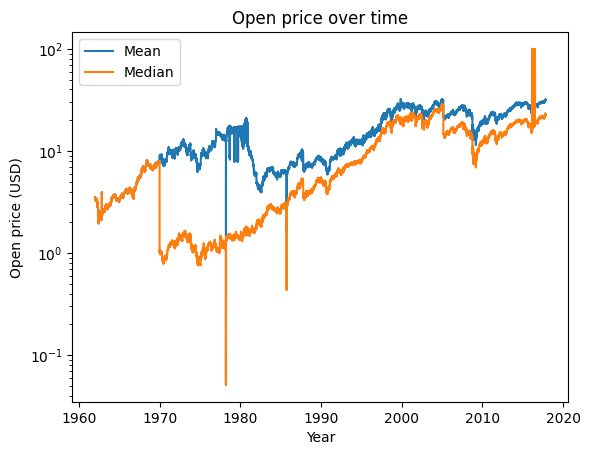

In [18]:
date_data = df_test.groupby('Date')
dates = date_data.indices.keys()

plt.plot(dates, date_data['Open'].mean(), label='Mean')
plt.plot(dates, date_data['Open'].median(), label='Median')
plt.title('Open price over time')
plt.xlabel('Year')
plt.ylabel('Open price (USD)')
plt.yscale('log')
plt.legend()
plt.show()

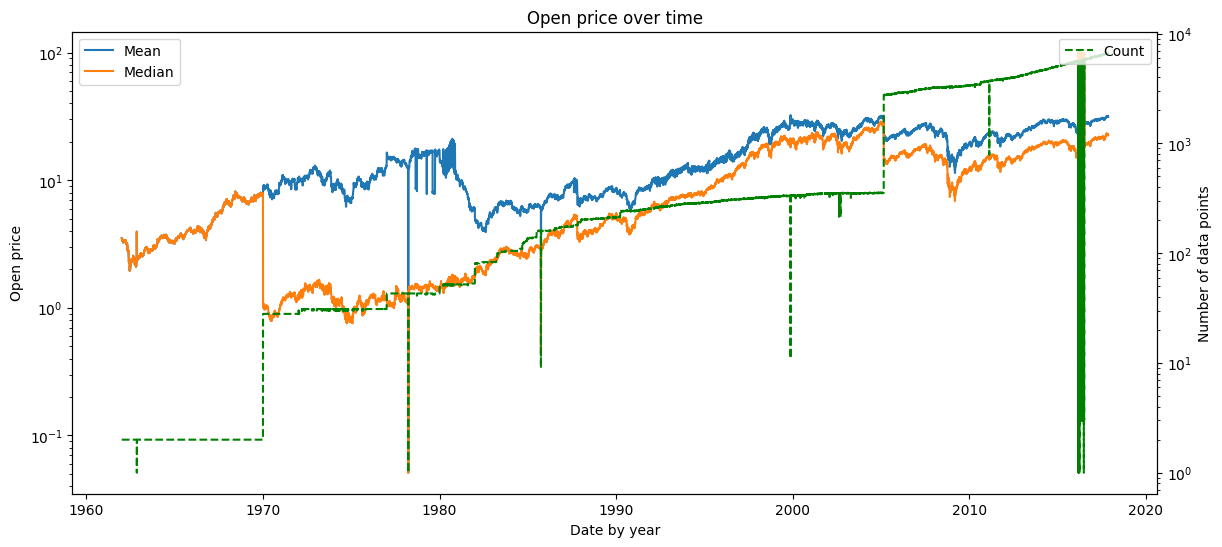

In [19]:
fig, ax1 = plt.subplots(figsize=(14,6))  # wider plots

# Left axis: mean & median
ax1.plot(dates, date_data['Open'].mean(), label='Mean')
ax1.plot(dates, date_data['Open'].median(), label='Median')
ax1.set_xlabel('Date by year')
ax1.set_ylabel('Open price')
ax1.set_yscale('log') 
ax1.legend(loc='upper left')

# Right axis: count of data points
ax2 = ax1.twinx()
ax2.plot(dates, date_data['Open'].count(), label='Count', color='green', linestyle='--')
ax2.set_ylabel('Number of data points')
ax2.legend(loc='upper right')
ax2.set_yscale("log")

plt.title('Open price over time')
plt.show()

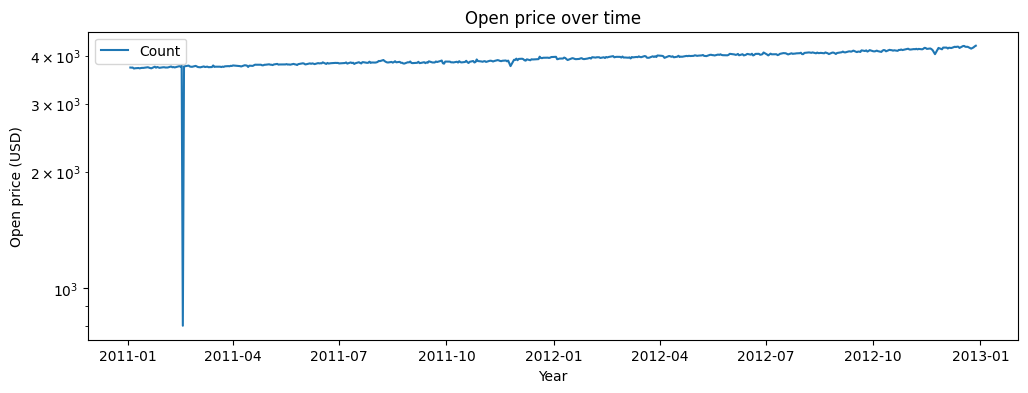

In [20]:
date_data = df[(df['Date'] > dt.datetime(2011, 1, 1)) & (df['Date'] < dt.datetime(2012, 12, 31))].groupby('Date')
dates = date_data.indices.keys()

plt.figure(figsize=(12, 4))
plt.plot(dates, date_data['Open'].count(), label='Count')
plt.title('Open price over time')
plt.xlabel('Year')
plt.ylabel('Open price (USD)')
plt.yscale('log')
plt.legend()
plt.show()

In [21]:
df_scaled[num_fields] = df_scaled[num_fields].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,Date,Open,High,Low,Close,Volume,Symbol
0,2005-08-25,5.5182,5.5182,5.5182,5.5182,16962,sdrl
1,2005-09-01,6.1761,6.1761,6.1761,6.1761,1698,sdrl
2,2005-09-02,6.0700,6.1761,6.0347,6.0700,18727,sdrl
3,2005-09-06,5.9286,6.0700,5.7517,5.9286,55410,sdrl
4,2005-09-07,5.8224,6.1054,5.7517,5.8224,47212,sdrl


### Apply label encoding to Symbol column

In [22]:
from sklearn import preprocessing

df_scaled['Symbol_label'] = preprocessing.LabelEncoder().fit_transform(df_scaled['Symbol'])

df_scaled.head()

,Date,Open,High,Low,Close,Volume,Symbol,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore,Symbol_label
0,2005-08-25,0.3108,0.3097,0.3114,0.3104,0.3572,sdrl,-0.8712,-0.8849,-0.8568,-0.8712,-0.8540,5756
1,2005-09-01,0.3267,0.3257,0.3274,0.3263,0.2071,sdrl,-0.7817,-0.7953,-0.7674,-0.7817,-1.7538,5756
2,2005-09-02,0.3242,0.3257,0.3241,0.3238,0.3636,sdrl,-0.7956,-0.7953,-0.7859,-0.7955,-0.8153,5756
3,2005-09-06,0.3209,0.3232,0.3172,0.3205,0.4344,sdrl,-0.8144,-0.8092,-0.8241,-0.8143,-0.3911,5756
4,2005-09-07,0.3183,0.3240,0.3172,0.3179,0.4239,sdrl,-0.8288,-0.8046,-0.8241,-0.8287,-0.4537,5756
